In [1]:
from google.colab import files
up=files.upload()

Saving Salary Dataset.csv to Salary Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Salary Dataset.csv")

In [4]:
data

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [6]:
data.isna().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,Salaries Reported
count,4339.000000
mean,2.777138
std,5.148095
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [10]:
data.nunique()

Company Name         2528
Job Title              25
Salaries Reported      49
Location                5
Salary               3098
dtype: int64

In [11]:
data.groupby('Job Title')['Salary'].max()

Job Title
Associate Machine Learning Engineer      ₹4,64,372/yr
Data Analyst                             ₹9,99,547/yr
Data Engineer                              ₹97,061/mo
Data Science                                ₹8,039/mo
Data Science Associate                  ₹12,03,913/yr
Data Science Consultant                 ₹26,71,464/yr
Data Science Lead                       ₹40,68,310/yr
Data Science Manager                    ₹46,19,021/yr
Data Scientist                             ₹99,573/mo
Data Scientist - Trainee                   ₹50,876/mo
Junior Data Scientist                    ₹7,08,351/yr
Lead Data Scientist                     ₹28,39,138/yr
Machine Learning Associate               ₹2,95,114/yr
Machine Learning Consultant             ₹12,26,327/yr
Machine Learning Data Analyst            ₹3,61,378/yr
Machine Learning Data Associate          ₹2,75,841/yr
Machine Learning Data Associate I        ₹2,58,596/yr
Machine Learning Data Associate II       ₹3,83,213/yr
Machine Learning D

In [12]:
data['Salary'].apply(lambda x: x.split('/')[1].strip()).unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [13]:
data['Salary'].str.slice(0,1).unique()

array(['₹', '$', '£', 'A'], dtype=object)

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
data['Annuul_sal'] = data['Salary'].str.replace('₹', '').str.replace('$', '').str.replace('£', '').str.replace('A', '')

In [16]:
data['working duration'] = data['Annuul_sal'].apply(lambda x: x.split('/')[1].strip())

In [17]:
data

,Company Name,Job Title,Salaries Reported,Location,Salary,Annuul_sal,working duration
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr","6,48,573/yr",yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr","11,91,950/yr",yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr","8,36,874/yr",yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr","6,69,578/yr",yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr","9,44,110/yr",yr
...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo","5,180/mo",mo
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr","7,51,286/yr",yr
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr","4,10,952/yr",yr
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr","16,12,324/yr",yr


In [18]:
import re

In [19]:
data['Annuul_sal']=data['Annuul_sal'].apply(lambda x: re.sub(r'\D', '', x))

In [20]:
data['Currency']=data['Salary'].str.slice(0,1)

In [21]:
data

,Company Name,Job Title,Salaries Reported,Location,Salary,Annuul_sal,working duration,Currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573,yr,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950,yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874,yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578,yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110,yr,₹
...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",5180,mo,₹
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",751286,yr,₹
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",410952,yr,₹
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",1612324,yr,₹


In [22]:
#$=80.34,'£'=103.31,AFN=1.18
data.at[2278, "Currency"] = "AFN"


In [23]:
data['Annuul_sal']=data['Annuul_sal'].astype(float)

In [24]:
for i in data.iterrows():
    if i[1]['Currency'] == '$':
        data.loc[i[0], 'Annuul_sal'] *= 80.34
    elif i[1]['Currency'] == '£':
        data.loc[i[0], 'Annuul_sal'] *= 103.31
    else:
        data.loc[i[0], 'Annuul_sal'] *= 1.18


In [25]:
data

,Company Name,Job Title,Salaries Reported,Location,Salary,Annuul_sal,working duration,Currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",765316.14,yr,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1406501.00,yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",987511.32,yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",790102.04,yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",1114049.80,yr,₹
...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",6112.40,mo,₹
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",886517.48,yr,₹
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",484923.36,yr,₹
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",1902542.32,yr,₹


In [26]:
data['Annuul_sal'].loc[data['working duration'] == 'hr']=data['Annuul_sal']*2080

In [27]:
data['Annuul_sal'].loc[data['working duration'] == 'mo'] = data['Annuul_sal'] * 12

In [28]:
data

,Company Name,Job Title,Salaries Reported,Location,Salary,Annuul_sal,working duration,Currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",765316.14,yr,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1406501.00,yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",987511.32,yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",790102.04,yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",1114049.80,yr,₹
...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",73348.80,mo,₹
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",886517.48,yr,₹
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",484923.36,yr,₹
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",1902542.32,yr,₹


In [29]:
data

,Company Name,Job Title,Salaries Reported,Location,Salary,Annuul_sal,working duration,Currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",765316.14,yr,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1406501.00,yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",987511.32,yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",790102.04,yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",1114049.80,yr,₹
...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",73348.80,mo,₹
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",886517.48,yr,₹
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",484923.36,yr,₹
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",1902542.32,yr,₹


In [30]:
data['Salaries Reported'].max()

105.0

In [31]:
data['Salaries Reported'].min()

1.0

In [32]:
data.groupby(['Location','Job Title'])['Annuul_sal'].max()

Location   Job Title                           
Bangalore  Data Analyst                            1.788450e+06
           Data Engineer                           3.997747e+06
           Data Scientist                          1.730238e+08
           Machine Learning Engineer               1.036065e+07
Hyderabad  Associate Machine Learning Engineer     5.479590e+05
           Data Analyst                            4.126985e+07
           Data Engineer                           1.239720e+08
           Data Scientist                          6.134438e+06
           Machine Learning Associate              3.482345e+05
           Machine Learning Data Analyst           4.264260e+05
           Machine Learning Data Associate         3.254924e+05
           Machine Learning Data Associate I       3.051433e+05
           Machine Learning Data Associate II      4.521913e+05
           Machine Learning Engineer               7.404925e+06
           Senior Machine Learning Engineer        3.670

<Axes: xlabel='Job Title'>

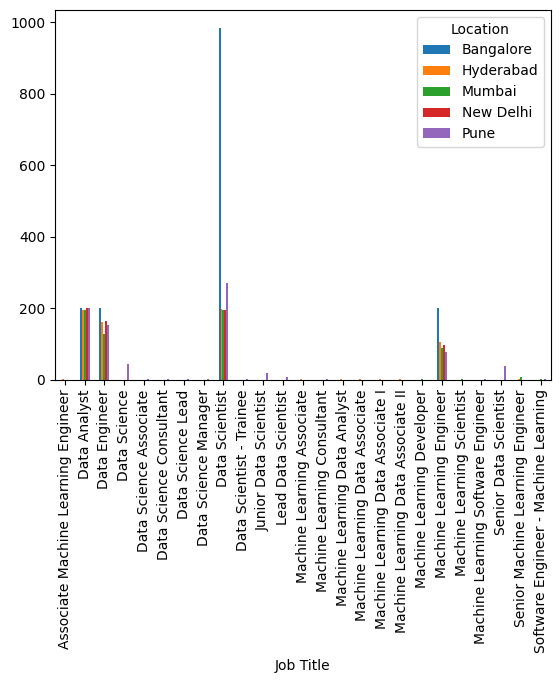

In [ ]:
pd.crosstab(data['Job Title'],data['Location']).plot(kind='bar')

array([[<Axes: title={'center': 'Salaries Reported'}>,
        <Axes: title={'center': 'Annuul_sal'}>]], dtype=object)

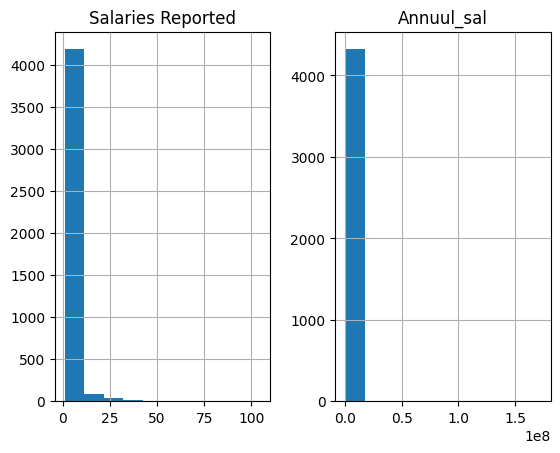

In [ ]:
data.hist()

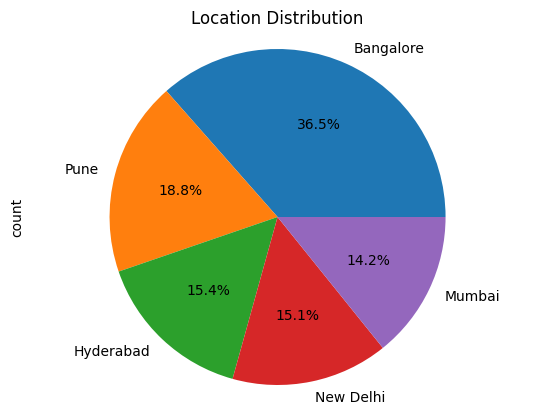

In [ ]:
data['Location'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Location Distribution')
plt.axis('equal')
plt.show()

<Axes: xlabel='Salaries Reported'>

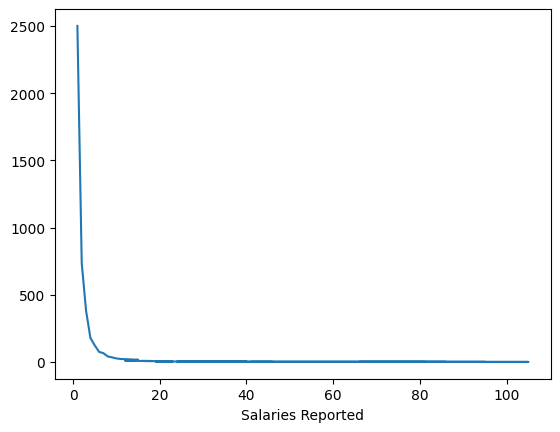

In [ ]:
data['Salaries Reported'].value_counts().plot(kind='line')

In [34]:
data['Job Title'].value_counts()

Job Title
Data Scientist                          1844
Data Analyst                             988
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1


<Axes: xlabel='Job Title'>

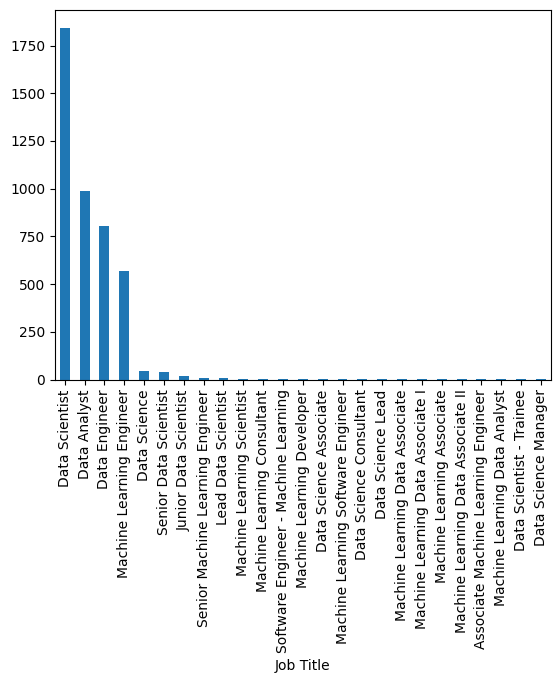

In [40]:
data['Job Title'].value_counts().plot(kind='bar')   #highestJob are Data Sc

In [47]:
data.groupby('Location')['Company Name'].value_counts()

Location   Company Name                        
Bangalore  Tata Consultancy Services               8
           Amazon                                  8
           Accenture                               8
           Fresher                                 8
           IBM                                     7
                                                  ..
Pune       Senquire Analytics                      1
           Seventh Contact Hiring Solutions        1
           Sears IT & Management Services India    1
           Scandid                                 1
           Águas Guariroba                         1
Name: count, Length: 3065, dtype: int64

In [57]:
x=data.sort_values(by='Annuul_sal',ascending=False).head(10)

In [58]:
x

,Company Name,Job Title,Salaries Reported,Location,Salary,Annuul_sal,working duration,Currency
585,MiQ,Data Scientist,1.0,Bangalore,"£16,74,802/yr",1.730238e+08,yr,£
3407,Cognizant Technology Solutions,Data Engineer,1.0,Hyderabad,"£1,00,000/mo",1.239720e+08,mo,£
3285,Datametica,Data Engineer,1.0,Pune,"£10,15,458/yr",1.049070e+08,yr,£
1115,Saama Technologies,Data Scientist,1.0,Pune,"£9,34,857/yr",9.658008e+07,yr,£
1054,Tata Consultancy Services,Data Scientist,1.0,Pune,"£7,03,427/yr",7.267104e+07,yr,£
3419,Cognizant Technology Solutions,Data Engineer,1.0,Hyderabad,"$8,20,000/yr",6.587880e+07,yr,$
1865,DONE by NONE,Data Scientist,1.0,Mumbai,"$50,367/mo",4.855782e+07,mo,$
1869,Bharti Airtel,Data Scientist,1.0,Mumbai,"$6,04,401/yr",4.855758e+07,yr,$
2486,Genpact,Data Analyst,1.0,Hyderabad,"$5,13,690/yr",4.126985e+07,yr,$
658,Infosys,Data Scientist,1.0,Bangalore,"$5,11,613/yr",4.110299e+07,yr,$


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'MiQ'),
  Text(1, 0, 'Cognizant Technology Solutions'),
  Text(2, 0, 'Datametica'),
  Text(3, 0, 'Saama Technologies'),
  Text(4, 0, 'Tata Consultancy Services'),
  Text(5, 0, 'DONE by NONE'),
  Text(6, 0, 'Bharti Airtel'),
  Text(7, 0, 'Genpact'),
  Text(8, 0, 'Infosys')])

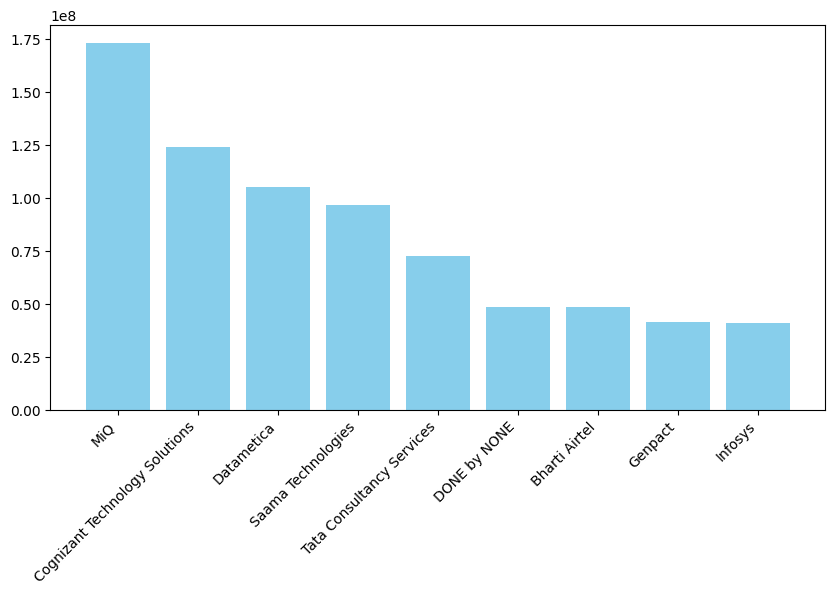

In [68]:
plt.figure(figsize=(10, 5))  # TOP 10 HIghest paying companies
plt.bar(x['Company Name'],x['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')

In [73]:
y=data.sort_values(by='Annuul_sal',ascending=False)

In [69]:
x['Location']=='Bangalore'

In [80]:
z=y[y['Location']=='Bangalore'].head(10)
z

,Company Name,Job Title,Salaries Reported,Location,Salary,Annuul_sal,working duration,Currency
585,MiQ,Data Scientist,1.0,Bangalore,"£16,74,802/yr",1.730238e+08,yr,£
658,Infosys,Data Scientist,1.0,Bangalore,"$5,11,613/yr",4.110299e+07,yr,$
900,L Brands,Data Scientist,1.0,Bangalore,"₹15,67,329/mo",2.219338e+07,mo,₹
419,Hashworks,Data Scientist,1.0,Bangalore,"₹13,43,505/mo",1.902403e+07,mo,₹
415,ICICI Bank,Data Scientist,1.0,Bangalore,"$2,24,948/yr",1.807232e+07,yr,$
574,Société Générale,Data Scientist,1.0,Bangalore,"₹95,68,943/yr",1.129135e+07,yr,₹
3876,Turing.com,Machine Learning Engineer,1.0,Bangalore,$62/hr,1.036065e+07,hr,$
834,Orbinet Technologies,Data Scientist,1.0,Bangalore,"₹7,22,612/mo",1.023219e+07,mo,₹
653,Ritwik IT Services,Data Scientist,1.0,Bangalore,"₹7,22,247/mo",1.022702e+07,mo,₹
662,Artis signature,Data Scientist,1.0,Bangalore,"₹75,24,456/yr",8.878858e+06,yr,₹


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'MiQ'),
  Text(1, 0, 'Infosys'),
  Text(2, 0, 'L Brands'),
  Text(3, 0, 'Hashworks'),
  Text(4, 0, 'ICICI Bank'),
  Text(5, 0, 'Société Générale'),
  Text(6, 0, 'Turing.com'),
  Text(7, 0, 'Orbinet Technologies'),
  Text(8, 0, 'Ritwik IT Services'),
  Text(9, 0, 'Artis signature')])

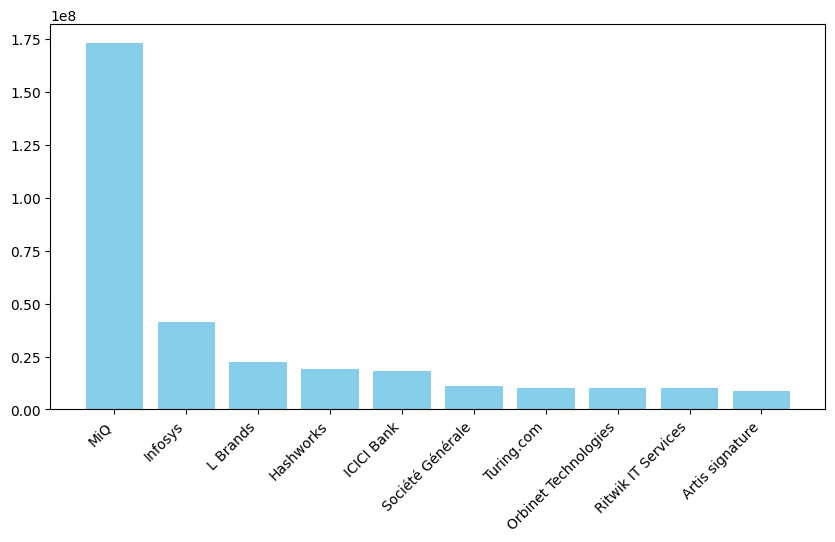

In [81]:

plt.figure(figsize=(10, 5))  # TOP 10 HIghest paying companies in bangalore
plt.bar(z['Company Name'],z['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Datametica'),
  Text(1, 0, 'Saama Technologies'),
  Text(2, 0, 'Tata Consultancy Services'),
  Text(3, 0, 'WNS'),
  Text(4, 0, 'Johnson Controls'),
  Text(5, 0, 'Google'),
  Text(6, 0, 'EBC'),
  Text(7, 0, 'Red Hat'),
  Text(8, 0, 'Atos'),
  Text(9, 0, 'Birlasoft')])

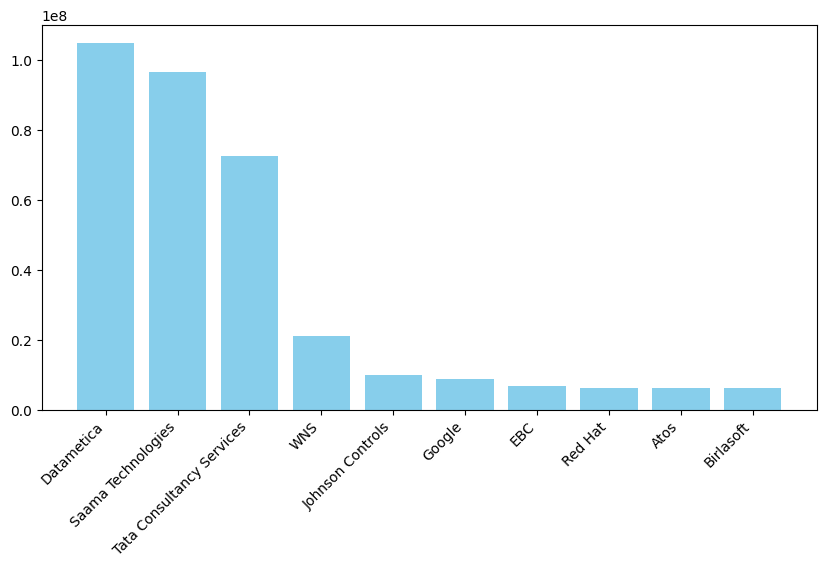

In [82]:
pune_h=y[y['Location']=='Pune'].head(10)
plt.figure(figsize=(10, 5))  # TOP 10 HIghest paying companies in pune
plt.bar(pune_h['Company Name'],pune_h['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Cognizant Technology Solutions'),
  Text(1, 0, 'Genpact'),
  Text(2, 0, 'ServiceNow'),
  Text(3, 0, 'Meta'),
  Text(4, 0, 'Amazon'),
  Text(5, 0, "Dr. Reddy's"),
  Text(6, 0, 'Qwerty Concepts'),
  Text(7, 0, 'ABCDEF'),
  Text(8, 0, 'SetuServ')])

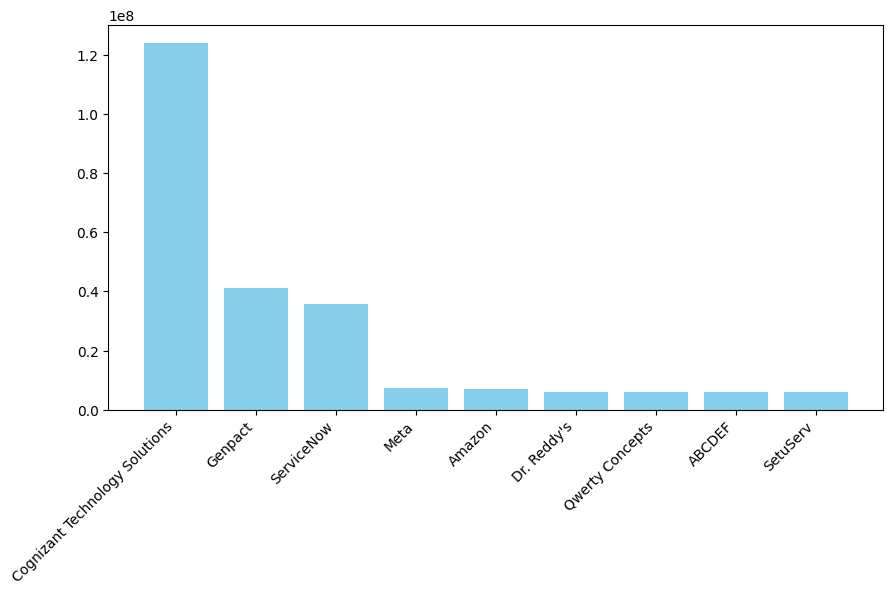

In [83]:
hy_h=y[y['Location']=='Hyderabad'].head(10)
plt.figure(figsize=(10, 5))  # TOP 10 HIghest paying companies in hyderabad
plt.bar(hy_h['Company Name'],hy_h['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'DONE by NONE'),
  Text(1, 0, 'Bharti Airtel'),
  Text(2, 0, 'IBM'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'ABC'),
  Text(5, 0, 'Rahul Industries'),
  Text(6, 0, 'Markelytics Solutions'),
  Text(7, 0, 'Morgan Stanley'),
  Text(8, 0, 'NVIDIA'),
  Text(9, 0, 'VINAYA KUMAR')])

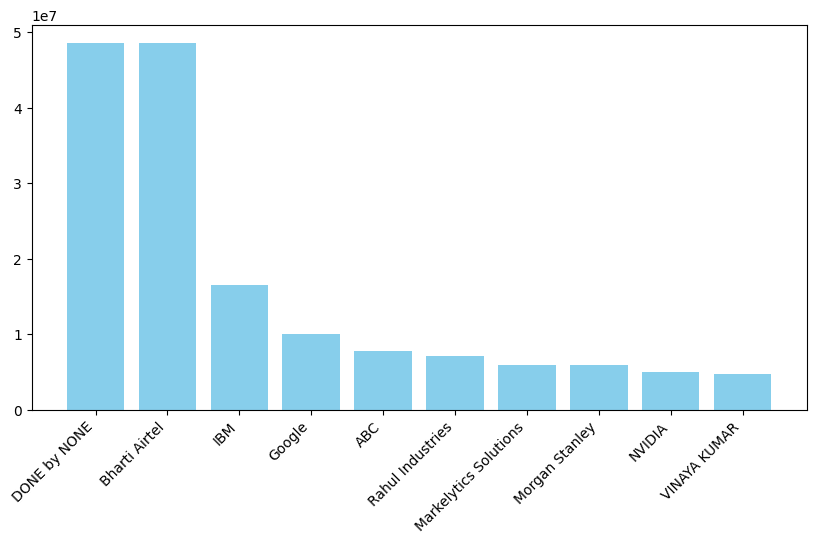

In [84]:
mi_h=y[y['Location']=='Mumbai'].head(10)
plt.figure(figsize=(10, 5))  # TOP 10 HIghest paying companies in Mumbai
plt.bar(mi_h['Company Name'],mi_h['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Engineer'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Senior Machine Learning Engineer'),
  Text(4, 0, 'Data Analyst'),
  Text(5, 0, 'Software Engineer - Machine Learning'),
  Text(6, 0, 'Machine Learning Developer'),
  Text(7, 0, 'Machine Learning Scientist')])

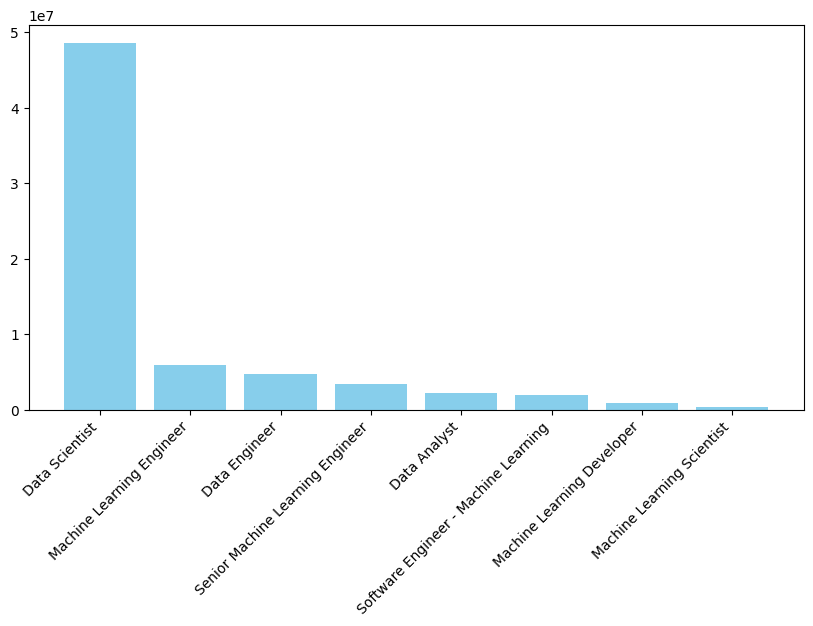

In [89]:
m_h=y[y['Location']=='Mumbai']
plt.figure(figsize=(10, 5))  # highes paying salari in mumbai
plt.bar(m_h['Job Title'],m_h['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Data Engineer'),
  Text(1, 0, 'Data Analyst'),
  Text(2, 0, 'Machine Learning Engineer'),
  Text(3, 0, 'Data Scientist'),
  Text(4, 0, 'Senior Machine Learning Engineer'),
  Text(5, 0, 'Associate Machine Learning Engineer'),
  Text(6, 0, 'Machine Learning Data Associate II'),
  Text(7, 0, 'Machine Learning Data Analyst'),
  Text(8, 0, 'Machine Learning Associate'),
  Text(9, 0, 'Machine Learning Data Associate'),
  Text(10, 0, 'Machine Learning Data Associate I')])

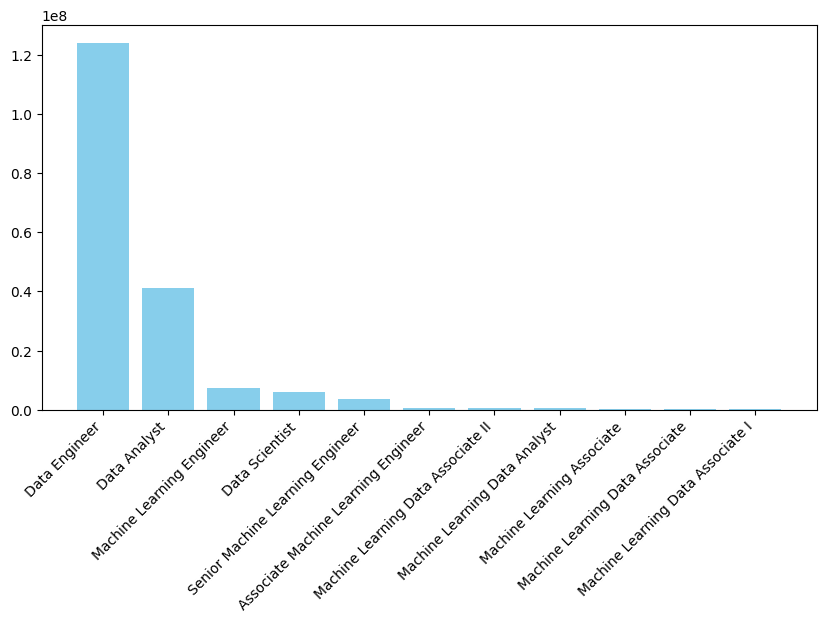

In [90]:
h_h=y[y['Location']=='Hyderabad']
plt.figure(figsize=(10, 5))  # highes paying salari in hyderabad
plt.bar(h_h['Job Title'],h_h['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Data Engineer'),
  Text(1, 0, 'Data Scientist'),
  Text(2, 0, 'Data Analyst'),
  Text(3, 0, 'Machine Learning Engineer'),
  Text(4, 0, 'Data Science Manager'),
  Text(5, 0, 'Data Science Lead'),
  Text(6, 0, 'Senior Data Scientist'),
  Text(7, 0, 'Lead Data Scientist'),
  Text(8, 0, 'Data Science Consultant'),
  Text(9, 0, 'Data Science'),
  Text(10, 0, 'Software Engineer - Machine Learning'),
  Text(11, 0, 'Junior Data Scientist'),
  Text(12, 0, 'Machine Learning Software Engineer'),
  Text(13, 0, 'Machine Learning Consultant'),
  Text(14, 0, 'Data Science Associate'),
  Text(15, 0, 'Data Scientist - Trainee')])

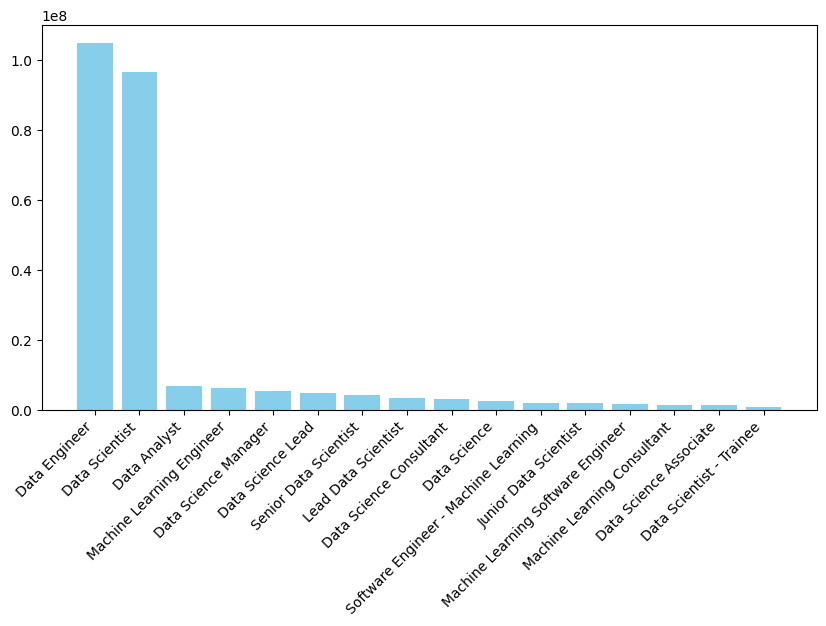

In [91]:
p_h=y[y['Location']=='Pune']
plt.figure(figsize=(10, 5))  # highes paying salari in mumbai
plt.bar(p_h['Job Title'],p_h['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3],
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Engineer'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Data Analyst')])

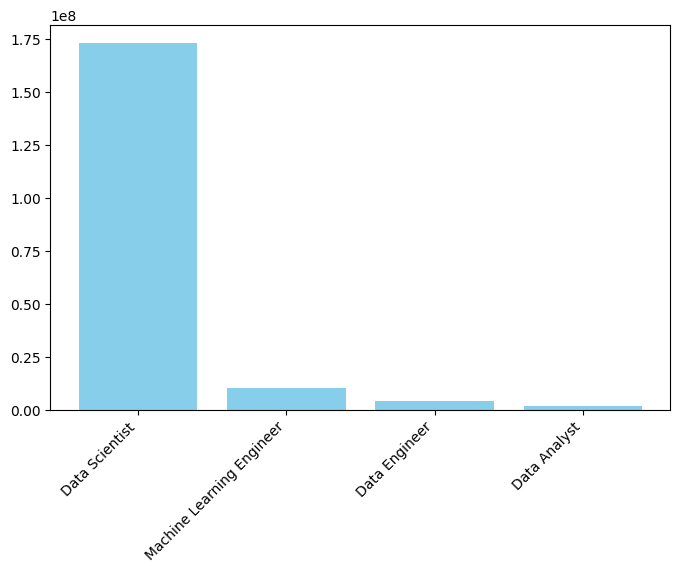

In [99]:
b_h=y[y['Location']=='Bangalore']
plt.figure(figsize=(8, 5))  # highes paying salari in mumbai
plt.bar(b_h['Job Title'],b_h['Annuul_sal'],color='skyblue')
plt.xticks(rotation=45, ha='right')